# BIA 678 - Final Project

#### Part 3

1. Who are our customers? Define the key segments of Instacart shoppers that emerge from clustering the customer data.  

Consider behaviors, motivations, demographics, purchasing habits, lifestyle factors, and any other relevant attributes that distinguish customer groups. Identify 3-5 key segments.

2. What characterizes each segment?  

For each key customer segment identified, dive deeper into analyzing:

- Common attributes of shoppers within the cluster (age, location, household profile, etc)
- Primary motivations and purchase drivers 
- Frequency of orders, basket sizes, category preferences
- Brand affinity and loyalty patterns
- Channel and device preferences
- Price sensitivity and coupon usage  

The goal is to paint a detailed, well-rounded profile of each segment.

3. How should we engage each segment? 

For each key customer segment, provide concrete recommendations for marketing and engagement strategies based on their attributes, behaviors and motivations.

- What messages and channels will best resonate?  
- What special offers or incentives would motivate purchases?
- How can the Instacart experience be tailored to their preferences?

Use both your data analysis and creative thinking to determine how to drive deeper connections with each segment.  

4. What additional insights can Claude or Chatgpt unearth?

Leverage Claude's AI capabilities to uncover non-intuitive patterns, themes, behaviors or causal relationships related to the identified customer segments. What supplemental insights can Claude contribute beyond the student's analysis?

 For each segment, they could ask ChatGPT or Claude follow-up questions like:

- What are some defining characteristics of this customer segment? 
- What kind of purchasing patterns do they exhibit? 
- What marketing strategies might resonate most with this segment?

ChatGPT and Claude can provide additional perspective by analyzing the data patterns for each cluster and offering insights into potential motivations, behaviors, and recommendations for engaging each segment.

Some sample prompts they could give ChatGPT or Claude include:

"Based on the purchasing data for customer segment X, what appears to motivate their purchases on Instacart? Provide 2-3 hypotheses."

"For customer segment Y with [define key attributes of segment], what marketing strategies would you recommend to increase engagement?" 

"Please analyze the purchasing patterns of customer segment Z and highlight any additional insights about how to cater offerings to appeal to this group."

The goal is to enrich the analysis by leveraging ChatGPT and Claude to uncover deeper insights from the data that the students may have missed or not emphasized in their initial analysis. This allows them to better understand and engage key customer groups.

In [1]:
# Import packages
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_aisles = pd.read_csv('aisles.csv')
df_departments = pd.read_csv('departments.csv')
df_orders = pd.read_csv('orders.csv')
df_products = pd.read_csv('products.csv')
df_order_products = pd.read_csv('order_products__prior.csv')

In [3]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
temp = pd.merge(df_products, df_departments, on='department_id')
df_main = pd.merge(temp, df_aisles, on='aisle_id')
df_main.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes


In [11]:
merged_order_products = pd.merge(df_order_products, df_main, on='product_id')
merged_order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs,eggs


In [12]:
temp = df_orders.merge(df_order_products, on='order_id')
df_merged = temp.merge(df_main, on='product_id')

In [13]:
df_merged = df_merged[df_merged['eval_set'] == 'prior']

#### Recency

In [14]:
# Calculate recency as the number of days since the last order for each user
recency_df = df_merged.groupby('user_id')['days_since_prior_order'].mean().reset_index()
recency_df.columns = ['user_id', 'recency']
recency_df.head()

,user_id,recency
0,1,20.259259
1,2,15.967033
2,3,11.487179
3,4,15.357143
4,5,14.500000


#### Monetary

In [15]:
quantity = df_merged.groupby('user_id').size().reset_index(name='no_products')
print(quantity.head())

   user_id  no_products
0        1           59
1        2          195
2        3           88
3        4           18
4        5           37


In [16]:
full_orders = df_merged.merge(quantity, on='user_id', how='left')
print(full_orders.head())

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  aisle_id  department_id department        aisle  no_products  
0         Soda        77       

In [17]:
quantity_items = full_orders.groupby('user_id')['no_products'].sum().reset_index(name='monetary')
print(quantity_items.describe())

             user_id      monetary
count  206209.000000  2.062090e+05
mean   103105.000000  6.644075e+04
std     59527.555167  2.265653e+05
min         1.000000  9.000000e+00
25%     51553.000000  1.521000e+03
50%    103105.000000  6.889000e+03
75%    154657.000000  3.534400e+04
max    206209.000000  1.387562e+07


#### Frequency

In [18]:
frequency = df_merged.groupby('user_id')['order_id'].count()
frequency = frequency.reset_index()
frequency.columns = ['user_id', 'frequency']
frequency.head()

,user_id,frequency
0,1,59
1,2,195
2,3,88
3,4,18
4,5,37


In [19]:
# Merge RFM metrics into a single DataFrame
rfm = recency_df.merge(frequency, on='user_id').merge(quantity_items, on='user_id')

# Assign RFM quartiles
rfm['R_quartile'] = pd.qcut(rfm['recency'], 4, ['4','3','2','1'])
rfm['F_quartile'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, ['1','2','3','4'])
rfm['M_quartile'] = pd.qcut(rfm['monetary'], 4, ['1','2','3','4'])

# Calculate RFM score
rfm['RFM_Score'] = rfm.R_quartile.astype(str) + rfm.F_quartile.astype(str) + rfm.M_quartile.astype(str)

rfm.head()

,user_id,recency,frequency,monetary,R_quartile,F_quartile,M_quartile,RFM_Score
0,1,20.259259,59,3481,2,2,2,222
1,2,15.967033,195,38025,2,4,4,244
2,3,11.487179,88,7744,3,3,3,333
3,4,15.357143,18,324,2,1,1,211
4,5,14.500000,37,1369,3,1,1,311


In [20]:
# Calculate percentiles
recency_threshold = rfm['recency'].quantile(0.90)
frequency_threshold = rfm['frequency'].quantile(0.90)
monetary_threshold = rfm['monetary'].quantile(0.90)

print(f"Recency Threshold: {recency_threshold}")
print(f"Frequency Threshold: {frequency_threshold}")
print(f"Monetary Threshold: {monetary_threshold}")

bad_customers = rfm[
    (rfm['recency'] >= recency_threshold) &
    (rfm['frequency'] <= frequency_threshold) &
    (rfm['monetary'] <= monetary_threshold)
]

print(bad_customers)

Recency Threshold: 26.097560975609756
Frequency Threshold: 386.0
Monetary Threshold: 148996.0
        user_id    recency  frequency  monetary R_quartile F_quartile  \
7             8  30.000000         49      2401          1          2   
11           12  26.169014         74      5476          1          2   
24           25  30.000000         21       441          1          1   
32           33  28.700000         53      2809          1          2   
40           41  26.314815         65      4225          1          2   
...         ...        ...        ...       ...        ...        ...   
206169   206170  26.113208         67      4489          1          2   
206171   206172  28.100000         28       784          1          1   
206172   206173  30.000000         18       324          1          1   
206187   206188  27.307692         63      3969          1          2   
206202   206203  29.103093        119     14161          1          3   

       M_quartile RFM_Score  

#### Normalize the RFM

In [21]:
scaler = StandardScaler()

In [22]:
rfm_normalized = rfm[['recency', 'frequency', 'monetary']]
rfm_normalized = scaler.fit_transform(rfm_normalized)
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized.head()


,0,1,2
0,0.664536,-0.481321,-0.277889
1,0.069007,0.184668,-0.125420
2,-0.552554,-0.339308,-0.259073
3,-0.015613,-0.682097,-0.291823
4,-0.134538,-0.589054,-0.287210


[370322.70615242654, 228145.91356135975, 158385.00706322378, 124850.9966116589, 97677.36165405795, 78799.28059761126, 67497.22382892345, 57903.54291209088, 51506.45996736195]


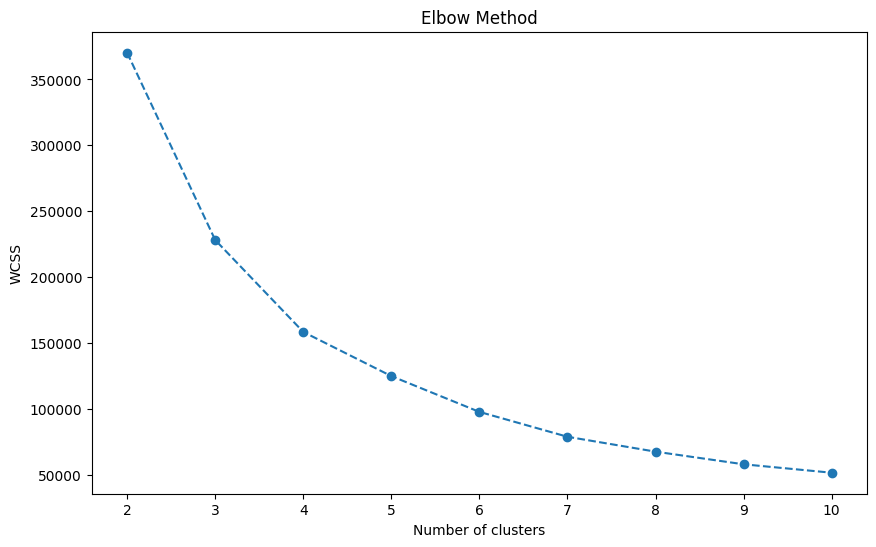

In [23]:
ssd = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=42)
    kmeans.fit(rfm_normalized)
    ssd.append(kmeans.inertia_)

print(ssd)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
rfm_normalized.columns = ['recency', 'frequency', 'monetary']

In [25]:
kmeans = KMeans(n_clusters=4, max_iter=300, n_init=10, random_state=42)
kmeans.fit(rfm_normalized)
rfm_normalized.loc[:,'user_id'] = rfm['user_id']
rfm_normalized.head()

,recency,frequency,monetary,user_id
0,0.664536,-0.481321,-0.277889,1
1,0.069007,0.184668,-0.125420,2
2,-0.552554,-0.339308,-0.259073,3
3,-0.015613,-0.682097,-0.291823,4
4,-0.134538,-0.589054,-0.287210,5


In [26]:
rfm_normalized['cluster'] = kmeans.labels_

#### Monetary vs recency Cluster

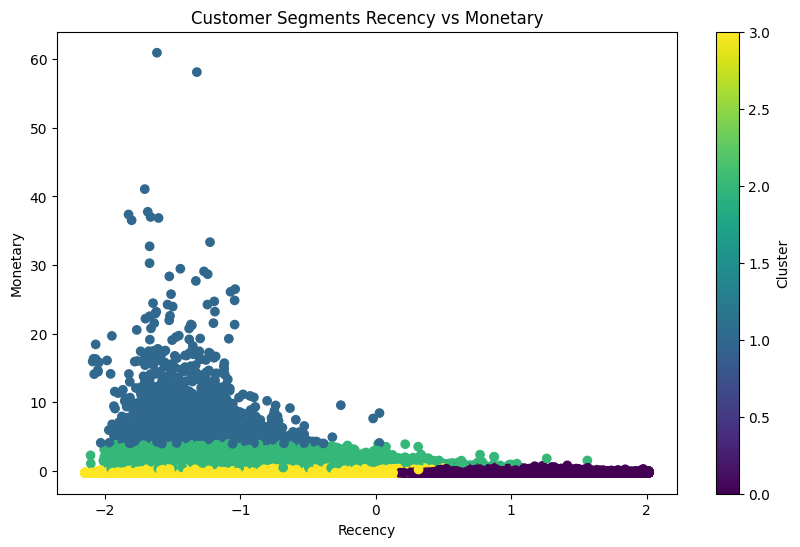

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(rfm_normalized['recency'], rfm_normalized['monetary'], c=rfm_normalized['cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Customer Segments Recency vs Monetary')
plt.colorbar(label='Cluster')
plt.show()

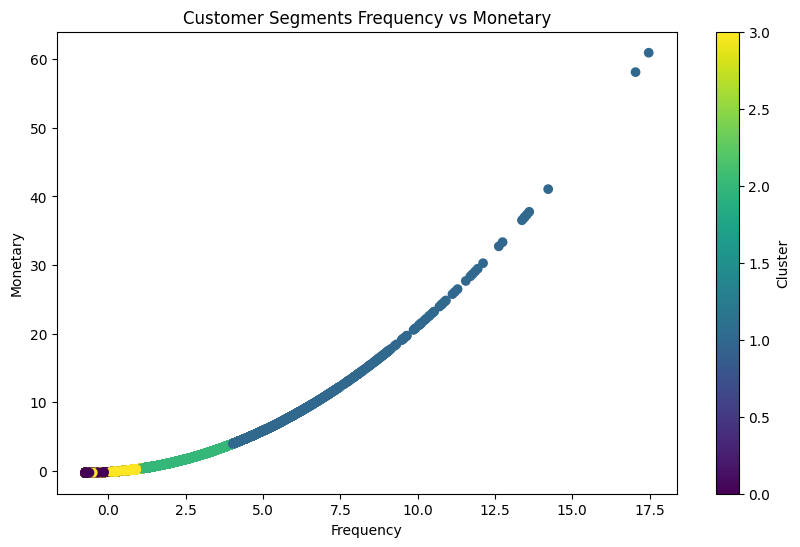

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(rfm_normalized['frequency'], rfm_normalized['monetary'], c=rfm_normalized['cluster'], cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Customer Segments Frequency vs Monetary')
plt.colorbar(label='Cluster')
plt.show()

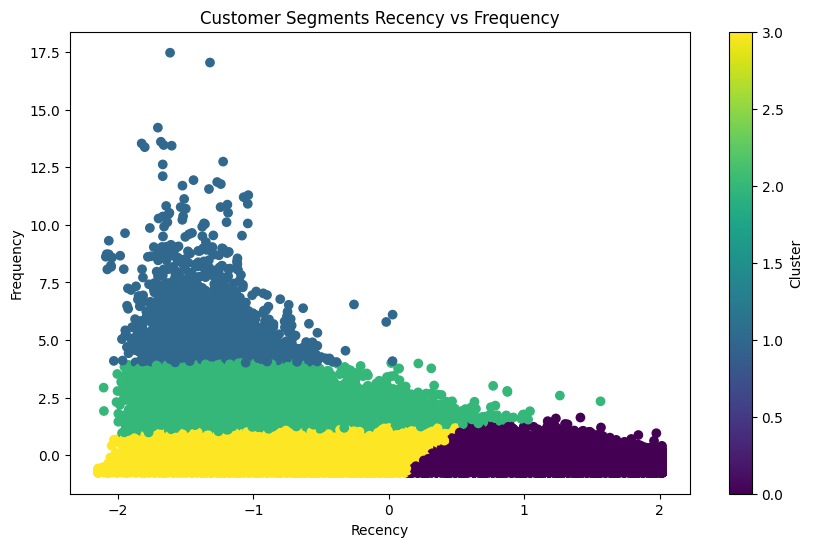

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(rfm_normalized['recency'], rfm_normalized['frequency'], c=rfm_normalized['cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Customer Segments Recency vs Frequency')
plt.colorbar(label='Cluster')
plt.show()

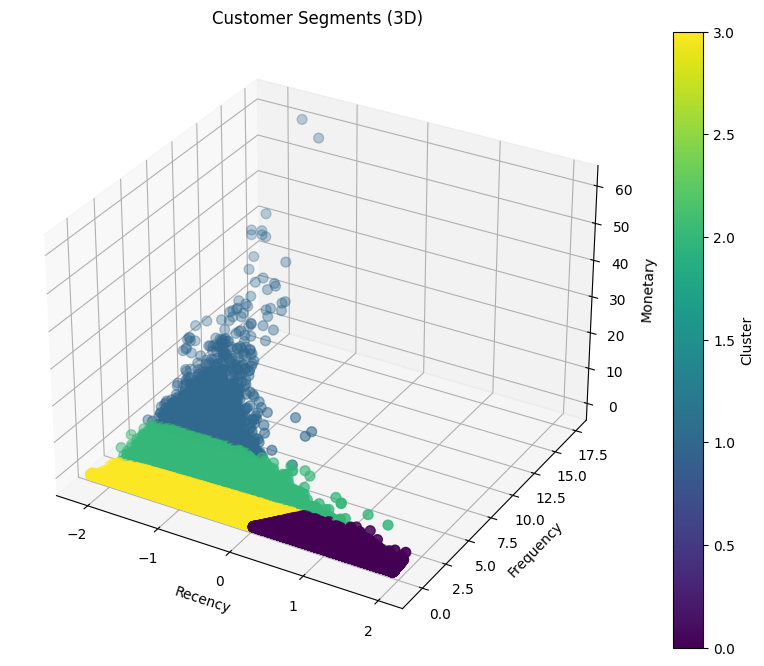

In [52]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(rfm_normalized['recency'], rfm_normalized['frequency'], rfm_normalized['monetary'], 
                c=rfm_normalized['cluster'], cmap='viridis', s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_title('Customer Segments (3D)')
ax.set_zlabel('Monetary')
plt.colorbar(sc, ax=ax, label='Cluster')
plt.show()

This scatter plot represents the recency vs monetary. The following observations are:

#### Cluster 0 (Blue) 
 * Consists of customers with lower recency while having higher monetary and frequency values. These customers indicate that these customers have occasional shopping events but typically spend a more than a usual customer. 
 * These customers are High-value, low recent customers. Instacart can reach out to them via email/messages as they aren't typically using the service often. Reaching out directly to their personal channels is a great way to entice them
 * Instacart can provide heavy discounts to entice these customers to not only visit more often but also provide a good experience for the customers who like to spend a lot at Instacart. 

  
 * Additional Insights from ChatGPT
  
    * Messages and Channels:

      * Channels: Email, in-app notifications, personalized landing pages.
      * Messages:
        Messages such as "We miss you! Come back for your favorite premium items" or "Exclusive offer for our top customers – we value your loyalty!"
        Emphasize appreciation for their past high-value purchases and encourage them to return.

    * Special Offers or Incentives:

      * VIP Programs:
        Introduce a VIP loyalty program with tiered rewards to entice them to return and maintain their high-value shopping habits.
        Offer exclusive benefits like early access to sales, special discounts, and personalized promotions.

      * Personal Shopper:
        Offer a personal shopper service to provide a more tailored and convenient shopping experience.
        Include exclusive access to premium products, ensuring they can easily find and purchase high-quality items.

    * Tailored Instacart Experience:

      * Premium Experience:
        Ensure a seamless and premium shopping experience with priority support, making them feel valued and special.
        Implement a dedicated customer support line or chat for VIP customers.

      * Tailored Content:
        Provide personalized content and product recommendations based on their previous high-value purchases.
        Use their shopping history to suggest new or similar premium products they might enjoy.
        Send personalized shopping lists, recipes, and exclusive content that align with their preferences and shopping behavior.

#### Cluster 1 (Yellow)
  * Mostly spread across a range of Recency values but remains at low Monetary values. This segment may include customers with varied recency who consistently spend very little. 
  * Similar to customers from the blue clusters, we can provide a series of channels and messages via email, messages, in-app notifications to give customers updates on coupons and discounts. 
  * Regard, special offers and incentive, Instacart can cater their bundle discounts, bulk discounts, or even packaged deals (ie. 2 for 1, 2 for 50% off) to increase the users' usage rate as well as increasing the size of their carts/basket.  
  * To tailore the experience for these customers, Instacart can reach out to the customers and provide them savings opportunity and design the user experience to help guide and persuade the users to buy on Instacart more.
  
  * Additional Insights from ChatGPT

    * Messages and Channels:

      * Channels: Email, in-app notifications, and direct mail.
      * Messages: Emphasize value and savings, such as "Save on your favorites!" or "Exclusive deals for you."

    * Special Offers or Incentives:

      * Bundle Deals: Offer discounts on bundle purchases to increase order size.
      * Referral Bonuses: Provide incentives for referring friends (e.g., 10 off for both parties).

    * Tailored Instacart Experience:

      * Budget-Friendly Options: Highlight cost-effective alternatives and bulk purchase options.
      * Savings Alerts: Notify them of sales and discounts on items they frequently purchase.
  
* Cluster 2 (Green)

  * These customers are located mostly at moderate to higher Recency values with slightly higher Monetary values than Cluster 1 (Yellow). These customers haven't purchased recently but have a higher spending history than cluster 1, indicating potential value if correct actions are taken to market towards these customers. Similar actions can be taken with the previous clusters such as the discounts for bulk items like cluster 1 or bigger discounts for single items like Cluster 0 to entice customers to return to using Instacart.  

  * Additional Insights from ChatGPT

    * Messages and Channels:

      * Channels: Email, push notifications, and social media.
      * Messages: Highlight product variety and quality, such as "Discover new products!" or "Curated picks for you."

    * Special Offers or Incentives:

      * Exclusive Access: Provide early access to sales and new product launches.
      * Membership Benefits: Promote a premium membership that offers additional discounts and perks.

    * Tailored Instacart Experience:

      * Personalized Offers: Use their purchase history to offer personalized discounts on items they like.
      * Subscription Services: Encourage subscribing to regular deliveries for frequently bought items.

#### Cluster 4 (Purple) 
  * Cluster 4 customers are concentrated at higher Recency values (close to or above zero) and very low Monetary values. These customers have make more recent purchases than the other customers but have low spending. These customers, while spending little amounts everytime they use Instacart, can still be great for Instacart since they are using the service more often than the other clusters of customers.
  * To engage with these customers, Instacart can send messages/emails to these customers to thank them for their loyalty and continued usage. Furthermore, these can be sent through the app's notifications to since the users are most likely using the app often to make their purchases. 
  * Instacart can provide special Offers or incentives can include loyalty programs with exclusive benefit, early access to new products or sales and personalized discounts or offers. Since these customers aren't here to shop often, Instacart can give them a bigger discount for the high amount of items and monetary spend.  
  * Instacart can tailor the customer experience by providing personalized shopping experiences with specific recommendations, give customers a priority in the delivery queue, or invitations to provide feedback for customer support and future marketing materials. 
  
  * Additional Insights from ChatGPT

    * Messages and Channels:

      * Channels: Email, in-app notifications, personalized landing pages.
      * Messages: Focus on appreciation and exclusivity, such as "Thank you for being a loyal customer!" or "Exclusive offer for our top customers."
 
    * Special Offers or Incentives:

      * VIP Programs: Introduce a VIP loyalty program with tiered rewards.
      * Personal Shopper: Offer a personal shopper service or exclusive access to premium products.

    * Tailored Instacart Experience:

      * Premium Experience: Ensure a seamless and premium shopping experience with priority support.
      * Tailored Content: Provide personalized content and product recommendations based on their high-value purchases.

#### Segmenting by departments

In [31]:
user_by_department_df = pd.crosstab(df_merged['user_id'], df_merged['department'])
user_by_department_df.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,13,3,0,0,13,0,0,...,2,0,0,0,0,1,0,0,5,22
2,0,0,2,9,3,0,1,48,21,0,...,0,3,1,0,0,11,1,0,36,42
3,0,0,0,3,0,0,0,21,2,4,...,1,0,0,0,0,4,0,0,38,9
4,2,0,2,3,0,0,1,0,2,0,...,2,0,0,0,0,0,0,0,2,1
5,0,0,0,0,0,0,1,8,1,1,...,0,2,0,0,0,2,0,0,19,1


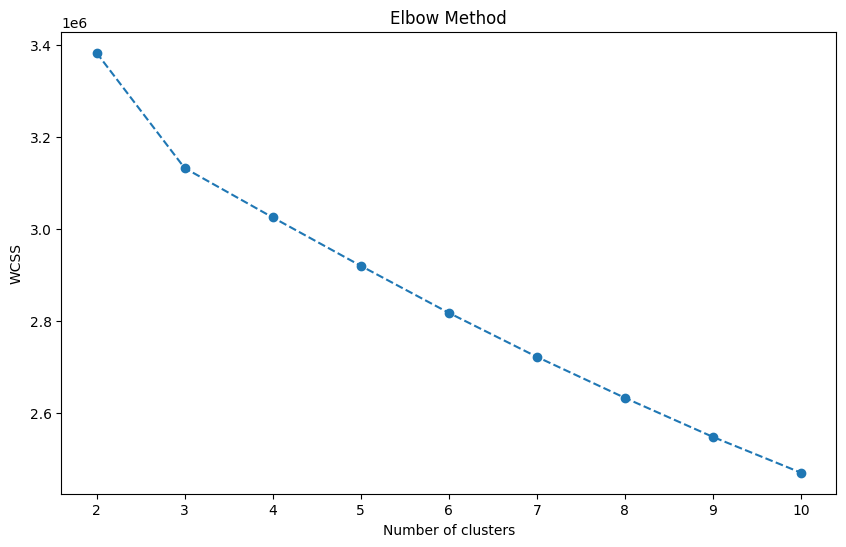

In [32]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(user_by_department_df)
scaled_df = pd.DataFrame(scaled_df)


# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plot the SSE to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=5, max_iter=300, random_state=42, n_init=10)
kmeans.fit_predict(ps)

array([3, 0, 3, ..., 0, 2, 3], dtype=int32)

In [39]:
user_by_department_df['cluster'] = kmeans.labels_
user_by_department_df.head(20)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,13,3,0,0,13,0,0,...,0,0,0,0,1,0,0,5,22,3
2,0,0,2,9,3,0,1,48,21,0,...,3,1,0,0,11,1,0,36,42,0
3,0,0,0,3,0,0,0,21,2,4,...,0,0,0,0,4,0,0,38,9,3
4,2,0,2,3,0,0,1,0,2,0,...,0,0,0,0,0,0,0,2,1,3
5,0,0,0,0,0,0,1,8,1,1,...,2,0,0,0,2,0,0,19,1,3
6,0,0,0,0,0,0,3,2,0,0,...,0,2,0,0,1,0,0,6,0,3
7,0,0,5,51,0,0,6,32,13,0,...,0,8,0,0,9,0,1,57,19,0
8,0,0,0,0,0,0,5,12,0,1,...,1,0,0,0,3,0,0,27,0,3
9,0,6,4,8,3,0,1,24,3,0,...,0,1,0,0,4,0,0,7,13,3


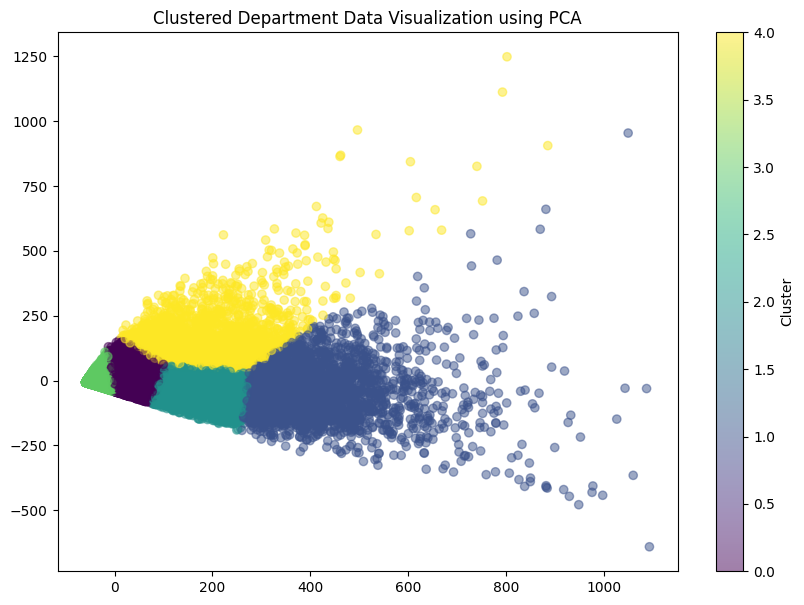

In [44]:
# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_samples = pca.fit_transform(user_by_department_df)
ps = pd.DataFrame(pca_samples)
ps.head()

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_samples[:, 0], pca_samples[:, 1], c=user_by_department_df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustered Department Data Visualization using PCA')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [45]:
c0 = user_by_department_df[user_by_department_df['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_by_department_df[user_by_department_df['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_by_department_df[user_by_department_df['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_by_department_df[user_by_department_df['cluster']==3].drop('cluster',axis=1).mean()
c4 = user_by_department_df[user_by_department_df['cluster']==4].drop('cluster',axis=1).mean()



In [46]:
c0.sort_values(ascending=False)[0:10]

department
produce            69.420062
dairy eggs         40.304421
snacks             20.938774
beverages          19.572870
frozen             17.313947
pantry             14.097011
bakery              8.787184
canned goods        8.201348
deli                7.948510
dry goods pasta     6.605519
dtype: float64

In [47]:
c1.sort_values(ascending=False)[0:10]

department
produce            392.687300
dairy eggs         170.382337
snacks              72.721718
frozen              52.944237
pantry              52.151281
beverages           50.613127
bakery              34.561900
canned goods        31.604055
deli                31.449573
dry goods pasta     25.975720
dtype: float64

In [48]:
c2.sort_values(ascending=False)[0:10]

department
produce            186.209473
dairy eggs          77.879742
snacks              32.415498
frozen              27.593623
beverages           26.678700
pantry              26.591554
canned goods        16.520656
bakery              15.853913
deli                15.629723
dry goods pasta     12.679696
dtype: float64

In [49]:
c3.sort_values(ascending=False)[0:10]

department
produce         14.908235
dairy eggs       9.731931
beverages        6.570938
snacks           6.068310
frozen           5.133971
pantry           4.068359
bakery           2.372013
canned goods     2.192443
household        2.180075
deli             2.044169
dtype: float64

In [50]:
c4.sort_values(ascending=False)[0:10]

department
dairy eggs    162.728482
produce       121.575408
snacks        108.269260
beverages      94.950565
frozen         51.588959
pantry         37.713425
bakery         31.734504
deli           24.625345
breakfast      23.130991
household      18.287578
dtype: float64

### Cluster 0

Persona Description Based on Cluster of Shoppers Sorted by Departments

Persona: Health-Conscious Convenience Seeker
Demographics:

  * Age: 25-45
  * Gender: Mixed, with a slight skew towards females
  * Income Level: Middle to upper-middle class
  * Location: Urban and suburban areas
  * Household Composition: Families with children, single professionals, and health-conscious couples

Shopping Behavior:

  * Primary Focus: Fresh produce, dairy, and healthy snacks
  * Shopping Frequency: Regular, with weekly or bi-weekly shopping trips
  * Basket Size: Medium to large, with a diverse range of items
  * Preferred Shopping Time: Weekends and evenings

Motivations and Values:

  * Health and Wellness: Prioritizes fresh, natural, and organic products
  * Convenience: Balances health-conscious choices with convenience items for a busy lifestyle
  * Quality: Willing to pay a premium for high-quality and specialty items
  * Sustainability: Cares about eco-friendly packaging and sustainable sourcing

#### Marketing and Engagement Strategies:

Messages and Channels:
  
* Channels: Email newsletters, mobile app notifications, social media (especially Instagram and Pinterest), and influencer partnerships
* Messages: Focus on health benefits, convenience, and quality. Use phrases like "Fresh and healthy choices delivered to your door," "Discover the best organic produce," and "Quick and nutritious meals for your busy life."     

Special Offers or Incentives:

* Discounts on Fresh Produce: Offer discounts or bundles on fresh fruits and vegetables.
* Loyalty Programs: Introduce a rewards program for frequent shoppers, offering points for every purchase that can be redeemed for discounts or exclusive products.
* Personalized Recommendations: Provide personalized product recommendations based on their purchase history, emphasizing new and seasonal items.   
   
Tailored Instacart Experience:
* Customized Shopping Lists: Create pre-made shopping lists focusing on healthy meal plans or quick and easy meals.
* Subscription Services: Offer subscription boxes for fresh produce, dairy, and snacks, allowing them to receive regular deliveries of their favorite items.
* Content and Recipes: Share healthy recipes and meal prep ideas through the app and email newsletters, using ingredients they frequently purchase.

### Cluster 3 

Persona Description Based on Cluster of Shoppers Sorted by Departments

Persona: Budget-Conscious Family Shopper
Demographics:

* Age: 30-50
* Gender: Mixed, with a slight skew towards females
* Income Level: Lower-middle to middle class
* Location: Suburban and rural areas
* Household Composition: Families with children, possibly multi-generational households

Shopping Behavior:

* Primary Focus: Essential groceries and household items
* Shopping Frequency: Weekly or bi-weekly shopping trips
* Basket Size: Large, with a focus on bulk purchases and essentials
* Preferred Shopping Time: Weekends and late afternoons

Motivations and Values:

    Budget-Conscious: Prioritizes affordable and value-for-money products.
    Convenience: Seeks convenient options that save time, such as pre-packaged and ready-to-eat items.
    Family-Oriented: Focuses on products that meet the needs of the entire family, including children.
    Quantity: Buys in bulk to maximize savings and minimize shopping trips.

#### Marketing and Engagement Strategies:

Messages and Channels:

* Channels: Email newsletters, mobile app notifications, social media (especially Facebook), and direct mail.
* Messages: Emphasize savings, value, and family-friendliness. Use phrases like "Save more on family essentials," "Affordable groceries for your home," and "Stock up and save."

Special Offers or Incentives:

* Bulk Discounts: Offer discounts on bulk purchases and family-sized packs.
* Loyalty Programs: Introduce a rewards program where they can earn points for every purchase and redeem them for discounts on future orders.
* Family Packs: Provide special offers on family packs of popular items like snacks, beverages, and frozen meals.

Tailored Instacart Experience:

* Budget-Friendly Options: Highlight budget-friendly and value-for-money products in the app.
* Shopping Lists: Create pre-made shopping lists focused on family essentials and budget-friendly meal plans.
* Savings Alerts: Notify them of sales and discounts on frequently purchased items and bulk deals.

4. Additional Insights from AI (Claude or ChatGPT)

Claude or ChatGPT can further uncover:

    Defining Characteristics:
        Cluster Characteristics: Primarily families looking for affordability and value, likely to be price-sensitive.
        Household Composition: Large households with multiple members, requiring diverse grocery needs.

    Purchasing Patterns:
        Cluster Patterns: Regular, large basket sizes with a focus on essential and bulk items.
        Seasonal Trends: Likely to see increased purchasing around back-to-school periods and holidays.

    Marketing Strategies:
        Cluster Strategies: Highlight savings, bulk deals, and family-friendly products.
        Engagement Tactics: Use personalized discounts, loyalty rewards, and convenient delivery options to attract and retain this segment.

Follow-up Questions to Ask AI:

    Cluster Characteristics:
        What are the common triggers for purchases in this segment?
        How do they respond to different types of promotions (e.g., percentage discounts vs. buy-one-get-one-free offers)?

    Purchasing Patterns:
        What are the most commonly purchased items within each department for this segment?
        Are there any notable changes in purchasing behavior during certain times of the year?

    Marketing Strategies:
        What specific messaging resonates most with this segment?
        How can we optimize the shopping experience to meet their needs for convenience and affordability?

By leveraging AI to delve deeper into these segments, Instacart can uncover non-intuitive patterns and behaviors, allowing for more effective and personalized engagement strategies.

### Cluster 4

Persona: Frequent Premium Shopper
Demographics:

    Age: 25-45
    Gender: Mixed, with no significant skew
    Income Level: Upper-middle to high
    Location: Urban areas
    Household Composition: Likely to be smaller households, singles, or couples without children

Shopping Behavior:

    Primary Focus: High-quality and diverse grocery items
    Shopping Frequency: Very frequent, possibly several times a week
    Basket Size: Large, driven by the variety and premium quality of purchases
    Preferred Shopping Time: Regularly shops throughout the week, favoring convenience and freshness
    
Motivations and Values:

    Quality Over Quantity: Prefers high-quality items and is willing to pay a premium.
    Health and Wellness: Values health-conscious options and products that fit a healthy lifestyle.
    Food Experience: Enjoys the process of cooking and trying new foods and flavors.

Marketing and Engagement Strategies:

Messages and Channels:

    Channels: Social media platforms, email campaigns, and app notifications geared toward a tech-savvy audience.
    Messages: Highlight the quality, exclusivity, and unique offerings available. Use phrases like "Elevate your culinary experiences with our finest selections" or "Discover the tastes of luxury in every aisle."

Special Offers or Incentives:

    Exclusive Access: Provide early access to new products or special editions.
    Loyalty Rewards: Enhance rewards for frequent purchases, especially in high-spend categories.

Tailored Instacart Experience:

    Premium Recommendations: Offer personalized suggestions based on past purchases and preferences.
    Customized Delivery Options: Provide flexible delivery windows to accommodate their busy lifestyle, ensuring products are delivered at peak freshness.